In [1]:
#Nastassia Sekulic
%display latex

<p style="text-align: center;"><span style="font-size: large;"><strong>KOSI HITAC</strong></span><strong><span style="font-size: medium;"><br /></span></strong><strong></strong></p>
<p style="text-align: center;"><strong><span style="font-size: medium;"><br /></span></strong></p>
<p><strong><span style="font-size: medium;">Zadatak 1. Rije&scaron;ite simbolički (desolve_system()) Newtonove diferencijalne jednadžbe za kosi hitac tijela jedinične mase i nacrtajte putanju tijela za neke početne uvjete. </span></strong><br /><strong><span style="font-size: medium;">Naputak: Gibanje je u dvije dimenzije. U y-smjeru ubrzanje je konstantno i iznosi y''=-10, dok je u x-smjeru ubrzanje nula.</span></strong></p>
<p><strong><span style="font-size: medium;">Rje&scaron;enje:<br /></span></strong></p>

<p>Newtonove diferencijalne jednadžbe su jednadžbe drugog reda. Da bi se mogle rije&scaron;iti simbolički pomoću funkcije desolve_system(), potrebno je jednadžbu drugog reda pretvoriti u dvije jednadžbe prvog reda. Zbog toga ovdje&nbsp;možemo vidjeti četiri jednadžbe prvog reda jer imamo ubrzanje u x i y smjeru za koje vrijedi: <strong>ax = dx<sup><span style="font-size: x-small;">2</span></sup>(t)/dt<sup><span style="font-size: x-small;">2</span></sup> = dvx(t)/dt = 0,&nbsp;ay = dy<sup><span style="font-size: x-small;">2</span></sup>(t)/dt<sup><span style="font-size: x-small;">2</span></sup> =&nbsp;dvy(t)/dt&nbsp;= - g</strong>; (g= 9.81 m/s<sup><span style="font-size: x-small;">2</span></sup>). Kada smo ih definirali, možemo koristiti desolve_system().</p>

In [2]:
t = var('t')
x = function('x')(t)
y = function('y')(t)
vx = function('vx')(t)
vy = function('vy')(t)
de1 = diff(x,t) == vx
de2 = diff(y,t) == vy
de3 = diff(vx,t) == 0
de4 = diff(vy,t) == -10
desolve_system([de1, de2, de3, de4], [x,y,vx,vy])

[x(t) == t*vx(0) + x(0),
 y(t) == -5*t^2 + t*vy(0) + y(0),
 vx(t) == vx(0),
 vy(t) == -10*t + vy(0)]

<p>Vidimo nepoznate varijable koje su početni uvjeti putanje tijela jedinične mase. U sljedećem dijelu definiramo iznose tih uvjeta.</p>
<p><strong>vx(0)=4, vy(0)=5, x(0)=0, y(0)=0</strong></p>

In [3]:
sol = desolve_system([de1, de2, de3, de4], [x,y,vx,vy], ics=[0,0,0,4,5]); sol

[x(t) == 4*t, y(t) == -5*t^2 + 5*t, vx(t) == 4, vy(t) == -10*t + 5]

<p>Uzet ćemo rje&scaron;enja x(t) i y(t) kako bi nacrtali putanju tijela.</p>

In [4]:
solnx, solny = sol[0].rhs(), sol[1].rhs()

<p>Imamo putanju tijela gdje je na horizontali x, odnosno domet tijela, a na vertikali y, odnosno visina koju tijelo doseže u svojem gibanju.</p>

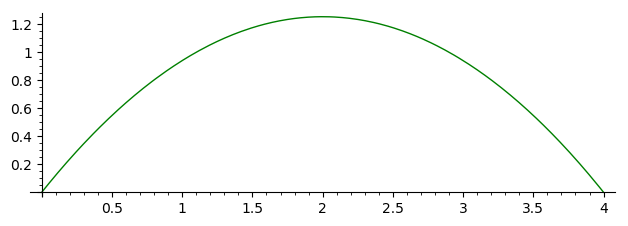

In [5]:
parametric_plot((solnx,solny),(0,1), color='green')

<p><span style="font-size: medium;"><strong><br /></strong></span></p>
<p><span style="font-size: medium;"><strong>Zadatak 2. Odredite (rje&scaron;avanjem odgovarajuće jednadžbe u Sage-u) trenutak tmax u kojem tijelo udara u podlogu (tad je y=0) i nacrtajte putanju točno do tog trenutka.</strong></span></p>
<p><span style="font-size: medium;"><strong>Rje&scaron;enje:<br /></strong></span></p>

In [6]:
tmax = var('tmax')

<p>Znajući da u trenutku tmax tijelo udara u podlogu, odnosno da mu je visina jednaka nuli, a domet maksimalan, u jednadžbi&nbsp;y(t) = -5*t^2 + t*vy(0) + y(0) stavimo da je y(t) jednak nuli. Tako dobivamo trenutak tmax.</p>

In [7]:
sol1 = solve(-5*tmax^2 + tmax*vy(0) + y(0) == 0, tmax); sol1

[tmax == -1/10*sqrt(vy(0)^2 + 20*y(0)) + 1/10*vy(0), tmax == 1/10*sqrt(vy(0)^2 + 20*y(0)) + 1/10*vy(0)]

<p>Dobivaju se dva rje&scaron;enja, ali mi uzimamo samo pozitivno rje&scaron;enje jer vrijeme je uvijek pozitivno, osim ako se drugačije ne odredi.</p>

In [8]:
tmax=sol1[1].rhs()

<p>U jednadžbu x(t) = t*vx(0) + x(0) ubacimo&nbsp;umjesto t vrijednost tmax te stavimo,&nbsp;kao u prvom dijelu zadatka,<strong> vy(0)=5, y(0)=0 </strong>kako bi dobili x(tmax), odnosno maksimalan domet u trenutku tmax.</p>

In [9]:
sol1nx=4*tmax.subs(vy(0)==5).subs(y(0)==0); sol1nx

4

<p>Koristimo isti crtež kao u prvom dijelu zadatka, ali dodajemo točku x(tmax) kako bi pokazali da su na&scaron;i izračuni valjani.</p>

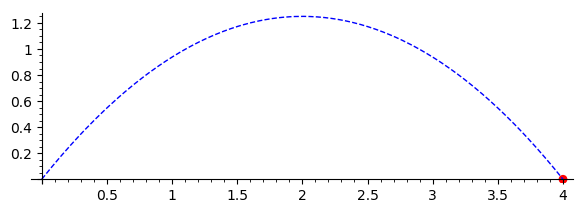

In [10]:
parametric_plot((solnx,solny),(0,1), linestyle='--') + list_plot([[sol1nx,0]],pointsize=40, color='red')

<p><strong><span style="font-size: medium;"><br /></span></strong></p>
<p><strong><span style="font-size: medium;">Zadatak 3. Isprogramirajte funkciju plot_hitac(vx0, vy0) koja crta tu putanju za početne uvjete x=0, y=10, vx=vx0, vy=vy0.</span></strong></p>
<p><strong><span style="font-size: medium;">Rje&scaron;enje:<br /></span></strong></p>

In [11]:
var('vx0,vy0')

(vx0, vy0)

<p>Slično kao i prije, samo &scaron;to je ovdje definirana funkcija plot_hitac koja za argumente ostavlja vx0 i vy0 koji će se kasnije proizvoljno&nbsp;odrediti, a unaprijed su definirani <strong>x(0)=0, y(0)=10.</strong></p>

In [12]:
def plot_hitac(vx0,vy0):
    rez = desolve_system([de1, de2 ,de3, de4], [x,y,vx,vy], ics=[0,0,10,vx0,vy0])
    rezx, rezy = rez[0].rhs(), rez[1].rhs()
    return parametric_plot((rezx, rezy), (0,2), color='purple')

<p>Putanja gibanja tijela sa proizvoljnim uvjetima. U ovom slučaju su uvjeti:&nbsp;<strong>vx(0)=4, vy(0)=5.</strong></p>

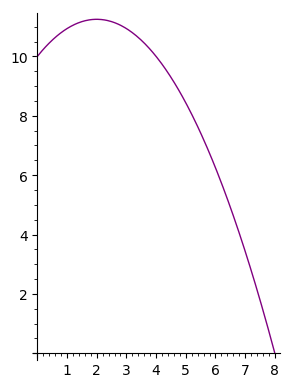

In [13]:
plot_hitac(4,5)

<p><strong><span style="font-size: medium;"><br /></span></strong></p>
<p><strong><span style="font-size: medium;">Zadatak 4. Upoznajte se s Sage komandom ("dekoratorom") @interact i isprogramirajte ćeliju gdje će se pomoću klizača namje&scaron;tati početni uvjeti vx0 i vy0.</span></strong></p>
<p><strong><span style="font-size: medium;">Rje&scaron;enje:<br /></span></strong></p>

<p>Koristimo funkciju kao iz prethodnog dijela, sa ne&scaron;to izmjenjenim kodom kako bi odgovarao kodu koji se koristi za Sage komandu @interact. Također koristimo proizvoljne uvjete za vx0 i vy0. Kako biste ih mogli unijeti, morate izvr&scaron;iti cijeli dokument.</p>

In [14]:
@interact
def _(vx0=(0,10), vy0=(0,10)):
    rez = desolve_system([de1, de2 ,de3, de4], [x,y,vx,vy], ics=[0,0,10,vx0,vy0])
    rezx, rezy = rez[0].rhs(), rez[1].rhs()
    show(parametric_plot((rezx, rezy), (0,2), color='red'))

Interactive function <function _ at 0x6fd7163c2f0> with 2 widgets
  vx0: IntSlider(value=5, description='vx0',…